In [1]:
from pulp import *
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

<img src="files/images/06_context.PNG" width="500" align="center">

**Normally, models are solved like below (no randomness)**

In [2]:
# Initialize Class, & Define Variables
model = LpProblem("Max_Glass_Co._Profits", LpMaximize)
A = LpVariable('A', lowBound=0)
B = LpVariable('B', lowBound=0)
C = LpVariable('C', lowBound=0)
# Define Objective Function
model += 500 * A + 450 * B + 600 * C
# Define Constraints & Solve
model += 6 * A + 5 * B + 8 * C <= 60
model += 10.5 * A + 20 * B + 10 * C <= 150
model += A <= 8
model.solve()

1

**Testing solution robustness**

There is a chance that model inputs could be inaccurate. In order to test robustness of the solution against change in input estimates, we use python's `random` module and add noise to the estimates in question. For example, if profit estimates in above model could be inaccurate, we run the model mutltiple times and add randomness/noise to these estimates in each run. Then we observe the solution over the multiple runs and how if it changes or not. 

In [3]:
def run_pulp_model():
    # Initialize Class, & Define Variables
    model = LpProblem("Max_Glass_Co._Profits", LpMaximize)
    A = LpVariable('A', lowBound=0)
    B = LpVariable('B', lowBound=0)
    C = LpVariable('C', lowBound=0)
    # store random noise values in lower case a, b, c
    # draw values from a normal distribution with mean = 0, std = 25
    a, b, c = random.normalvariate(0, 25), random.normalvariate(0, 25), random.normalvariate(0, 25)
    # Define Objective Function
    model += (500+a)*A + (450+b)*B + (600+c)*C
    # Define Constraints & Solve
    model += 6 * A + 5 * B + 8 * C <= 60
    model += 10.5 * A + 20 * B + 10 * C <= 150
    model += A <= 8
    model.solve()
    o = {'A':A.varValue, 'B':B.varValue, 'C':C.varValue, 'Obj':value(model.objective)}
    return(o)

**Run model in a for loop**

In [4]:
# variable for number of replications
r = 1000
# define a list of dictionaries to hold the output of each replication
output = []
for i in range(r):
    output.append(run_pulp_model())
# create a pandas df from the output list
df = pd.DataFrame(output)

In [5]:
df.head()

,A,B,C,Obj
0,6.666667,4.0,0.0,5332.104997
1,6.666667,4.0,0.0,5176.709135
2,6.666667,4.0,0.0,4976.038569
3,6.666667,4.0,0.0,5287.937723
4,6.666667,4.0,0.0,5046.939206


**Check the optimal solution and its frequency**

In [6]:
# optimal solution for A
print(df['A'].value_counts())

6.666667    709
8.000000    163
0.000000    128
Name: A, dtype: int64


709 out of 1000 times the optimal solution for A was 6.67. A relatively good result. This means that the risk of not getting the true optimal due to a wrong estimat for the profit of A is relatively low. The same goes for B and C. See below.

In [7]:
print(df['B'].value_counts())
print(df['C'].value_counts())

4.000000    709
2.400000    161
5.454546    127
0.000000      3
Name: B, dtype: int64
0.000000    870
4.090909    127
1.500000      2
7.500000      1
Name: C, dtype: int64


**Visualize the results**

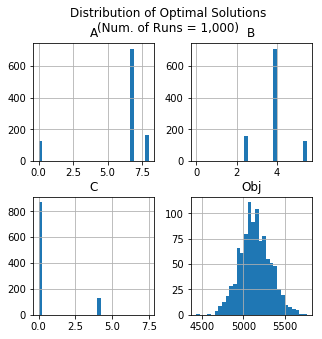

In [10]:
df.hist(bins=30, figsize=[5, 5]);
plt.suptitle('Distribution of Optimal Solutions\n(Num. of Runs = 1,000)');

**Note**: you might not want to use this method on problems that take PuLP a long time to solve